In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict
from scipy.signal import resample
from dtw import dtw
import time
from fastdtw import fastdtw

In [2]:
def dtw_distance(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n + 1, m + 1))
    dtw_matrix.fill(np.inf)
    dtw_matrix[0, 0] = 0
 
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = np.abs(s[i - 1] - t[j - 1])
            last_min = np.min([dtw_matrix[i, j - 1], dtw_matrix[i - 1, j], dtw_matrix[i - 1, j - 1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix[i, j]

In [3]:
# x = [1, 2, 3, 2, 0]
# y = [0, 1, 2, 3, 2]
# distance = dtw_distance(x, y)
# print(distance) 

x = [1, 2, 3, 2, 0, 4, 6, 7]
y = [0, 1, 2, 3, 2, 5, 7, 9]
alignment = [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4),(5,5),(6,6),(7,7)]
distance = dtw_distance(x, y)
print(distance)


7.0


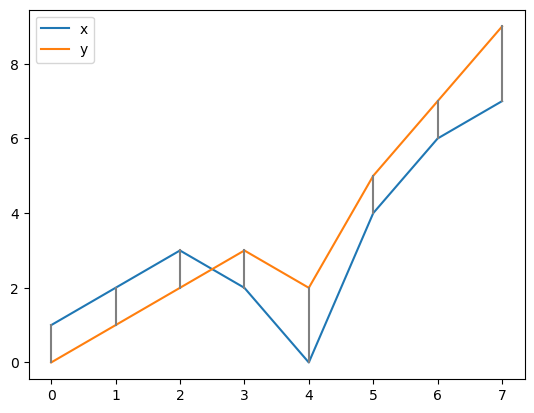

In [4]:
x = [1, 2, 3, 2, 0, 4, 6, 7]
y = [0, 1, 2, 3, 2, 5, 7, 9]
alignment = [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4),(5,5),(6,6),(7,7)]
plt.plot(x, label='x')
plt.plot(y, label='y')
for i, j in alignment:
    plt.plot([i, j], [x[i], y[j]], color='gray')
plt.legend()
plt.show()



In [5]:
num_ts = 10
time_series = []
for i in range(num_ts):
    ts = np.random.randn(10)
    time_series.append(ts)
t1 = time.time()
dist_matrix = np.zeros((num_ts, num_ts))
for i in range(num_ts):
    for j in range(num_ts):
        dist_matrix[i,j] = dtw_distance(time_series[i], time_series[j])
print(dist_matrix)
print("--- %s seconds ---" % (time.time() - t1))

[[ 0.          6.18742673  6.17173903  9.31781648  6.37460595  8.99971815
   8.30722096  8.70934991  8.35873598 10.32313268]
 [ 6.18742673  0.          7.44707075  8.33615887  8.6383185   6.78981629
   7.97287496  9.74214592  7.93560569 13.06005429]
 [ 6.17173903  7.44707075  0.          8.62261723  5.3736018   8.89525636
   7.49720143  8.9642646   8.33684983 13.41769039]
 [ 9.31781648  8.33615887  8.62261723  0.          8.79328425  7.55706115
   5.60271788  8.04960505  8.87153846 13.17857328]
 [ 6.37460595  8.6383185   5.3736018   8.79328425  0.          9.68643488
   5.83516256  7.2091039   8.35893856 10.68009075]
 [ 8.99971815  6.78981629  8.89525636  7.55706115  9.68643488  0.
   9.59213534  8.73431714  6.12727611 12.80856541]
 [ 8.30722096  7.97287496  7.49720143  5.60271788  5.83516256  9.59213534
   0.         11.53711033  7.30217773 14.35769744]
 [ 8.70934991  9.74214592  8.9642646   8.04960505  7.2091039   8.73431714
  11.53711033  0.         12.54966424 10.17419274]
 [ 8.358

In [6]:
num_ts = 10
ts_length = 100
time_series = []
for i in range(num_ts):
    ts = np.random.randn(ts_length)
    downsampled_ts = ts[::2]
    time_series.append(downsampled_ts)

copies = []
for ts in time_series:
    for i in range(100):
        scale = np.random.uniform(0.5, 1.5)
        shift = np.random.uniform(-1, 1)
        copy = scale * ts + shift
        copies.append(copy)

In [ ]:
copies[i]
copies[j]

array([ 1.03576573, -1.41100093,  1.30543894,  0.88186679,  0.69676266,
        1.39688624,  0.4263132 ,  0.69223322,  1.12357835,  1.95544   ,
        0.88579706,  1.36745517,  0.15857308,  0.48859639,  1.10732119,
       -0.13066889,  2.75794733,  1.61030107,  0.71275457,  0.05738266,
       -0.42312008,  0.09043072,  1.40534924,  1.20368981,  2.29179344,
        0.93656434,  1.31121768,  0.57702227,  2.03170717,  2.21160771,
        0.74183277,  2.13226986,  1.02857999,  1.10825105,  0.79420051,
       -0.23850146,  2.61852208,  1.2224008 ,  0.3187402 ,  1.00661025,
        1.35611422,  1.03888002,  0.36955095,  2.34148085,  1.67544372,
        2.11871762,  0.36962978,  1.13932872, -0.22362515,  1.29391895])

In [18]:
# it takes a long time to calculate
t2 = time.time()
dist_matrix = np.zeros((num_ts*100, num_ts*100))
for i in range(num_ts*100):
    for j in range(num_ts*100):
        dist_matrix[i,j] = dtw_distance(copies[i], copies[j])
print(dist_matrix)
print("--- %s seconds ---" % (time.time() - t2))


[[ 0.         16.56520624 30.98483982 ... 32.76344995 62.34500559
  27.18404981]
 [16.56520624  0.         36.05978608 ... 44.03187737 71.27639809
  40.59156271]
 [30.98483982 36.05978608  0.         ... 39.03692061 49.33351638
  48.37821348]
 ...
 [32.76344995 44.03187737 39.03692061 ...  0.         42.94078041
  31.50819293]
 [62.34500559 71.27639809 49.33351638 ... 42.94078041  0.
  66.57330474]
 [27.18404981 40.59156271 48.37821348 ... 31.50819293 66.57330474
   0.        ]]
--- 30660.185545921326 seconds ---


In [9]:
def dtw_distance_ds(x, y, downsample=None):
    if downsample is not None:
        x = resample(x, int(len(x)/downsample))
        y = resample(y, int(len(y)/downsample))
    n, m = len(x), len(y)
    dtw = np.zeros((n+1, m+1))

    for i in range(1, n+1):
        dtw[i, 0] = np.inf
    for j in range(1, m+1):
        dtw[0, j] = np.inf
    dtw[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(x[i-1] - y[j-1])
            dtw[i, j] = cost + min(dtw[i-1, j], dtw[i, j-1], dtw[i-1, j-1])
    return dtw[n, m]

In [10]:
t3 = time.time()
dist_matrix = np.zeros((num_ts*100, num_ts*100))
for i in range(num_ts*100):
    for j in range(num_ts*100):
        dist_matrix[i,j] = dtw_distance_ds(copies[i], copies[j],10)
print(dist_matrix)
dist_matrix.shape
print("--- %s seconds ---" % (time.time() - t3))


[[0.         0.48385875 3.27897095 ... 2.18430785 7.42938941 1.51700073]
 [0.48385875 0.         3.78958324 ... 2.69492014 7.9400017  1.56353603]
 [3.27897095 3.78958324 0.         ... 1.67247896 4.15041846 4.64866036]
 ...
 [2.18430785 2.69492014 1.67247896 ... 0.         5.24508156 3.55399726]
 [7.42938941 7.9400017  4.15041846 ... 5.24508156 0.         8.79907882]
 [1.51700073 1.56353603 4.64866036 ... 3.55399726 8.79907882 0.        ]]
--- 97.56638693809509 seconds ---


In [11]:
def fast_dtw(x, y, radius=1, dist=lambda a, b: np.sum(np.abs(a - b))):
    min_time_size = radius + 2
    if len(x) < min_time_size or len(y) < min_time_size:
        return dtw(x, y, dist=dist)
    x_shrinked = __reduce_by_half(x)
    y_shrinked = __reduce_by_half(y)
    distance, path = fast_dtw(x_shrinked, y_shrinked, radius=radius, dist=dist)
    window = __expand_window(path, len(x), len(y), radius)
    return dtw(x, y, window, dist=dist)

def dtw(x, y, window=None, dist=lambda a, b: np.sum(np.abs(a - b))):
    len_x, len_y = len(x), len(y) 
    if window is None: 
        window = [(i, j) for i in range(len_x) for j in range(len_y)]
    window = ((i + 1, j + 1) for i, j in window)
    D = defaultdict(lambda: (float('inf'),))
    D[0, 0] = (0, 0, 0)
    for i, j in window:
        dt = dist(x[i-1], y[j-1]) 
        D[i, j] = min((D[i-1, j][0]  +dt, i-1, j  ),
                      (D[i, j-1][0]  +dt, i  , j-1),
                      (D[i-1, j-1][0]+dt, i-1, j-1), key=lambda a: a[0])# 移动法则
        
    path = []
    i, j = len_x, len_y 
    while not (i == j == 0):
        path.append((i-1, j-1))
        i, j = D[i, j][1], D[i, j][2]
    path.reverse()
    return (D[len_x, len_y][0], path)

def __expand_window(path, len_x, len_y, radius):
    path_ = set(path)
    for i, j in path:
        for a, b in ((i + a, j + b)
                     for a in range(-radius, radius+1)
                     for b in range(-radius, radius+1)):
            path_.add((a, b))
    window_ = set()
    for i, j in path_:
        for a, b in ((i * 2, j * 2), (i * 2, j * 2 + 1),
                     (i * 2 + 1, j * 2), (i * 2 + 1, j * 2 + 1)):
            window_.add((a, b))

    window = []
    start_j = 0
    for i in range(0, len_x):
        new_start_j = None
        for j in range(start_j, len_y):
            if (i, j) in window_:
                window.append((i, j))
                if new_start_j is None:
                    new_start_j = j
            elif new_start_j is not None:
                break
        start_j = new_start_j
    return window

def __reduce_by_half(x):
    x_reduce = []
    lens = len(x)
    for i in range(0, lens, 2):
        if (i+1) >= lens:
            half = x[i]
        else:
            half = (x[i] + x[i + 1]) / 2
        x_reduce.append(half)
    return x_reduce


In [ ]:
t4 = time.time()
dist_matrix = np.zeros((num_ts*100, num_ts*100))
for i in range(num_ts*100):
    for j in range(num_ts*100):
        dist_matrix[i,j],path = fast_dtw(copies[i], copies[j])
print(dist_matrix)
dist_matrix.shape
print("--- %s seconds ---" % (time.time() - t4))


KeyboardInterrupt: 